In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2

In [3]:
def correlation(img: np.ndarray, w: np.ndarray):


    num_rows, num_cols = img.shape
    f_num_rows, f_num_cols = w.shape
    half_f_n_rows, half_f_num_cols = f_num_rows//2, f_num_cols//2


    img_padded = np.pad(img, [[half_f_n_rows, half_f_n_rows], [half_f_num_cols, half_f_num_cols]])
    new_image = np.zeros(img.shape)

    for im_row in range(num_rows):
        for im_col in range(num_cols):
            result_pixel = 0

            patch = img_padded[im_row:im_row+f_num_rows, im_col:im_col+f_num_cols]
            new_image[im_row, im_col] = np.sum(w*patch)
    
    return new_image


In [121]:
def correlation_ef(img: np.ndarray, w: np.ndarray):
    return np.einsum('ijkl,kl->ij', np.lib.stride_tricks.as_strided(img,tuple(np.subtract(img.shape, w.shape) + 1) + w.shape,img.strides + img.strides), w)


In [122]:
def convolution(img, w):
    print (w)
    w_inv = w[::-1, ::-1]
    img_filtered = correlation(img, w_inv)

    return img_filtered

In [123]:
image = cv2.imread('imagens/1008.png', 0)
# image = np.array([[2,3,1,4,3,2,1,1,2]])
w = np.array([[1,2,-1],[0,0,0],[-1,-2,-1]])
%time cor_image = convolution(image, w)

%time cor_image_ef = correlation_ef(image, w)
# %timeit -n1 conv_image = convolution(image, w)

[[ 1  2 -1]
 [ 0  0  0]
 [-1 -2 -1]]
CPU times: user 1.2 s, sys: 9.87 ms, total: 1.21 s
Wall time: 1.21 s
CPU times: user 6.41 ms, sys: 0 ns, total: 6.41 ms
Wall time: 5.99 ms


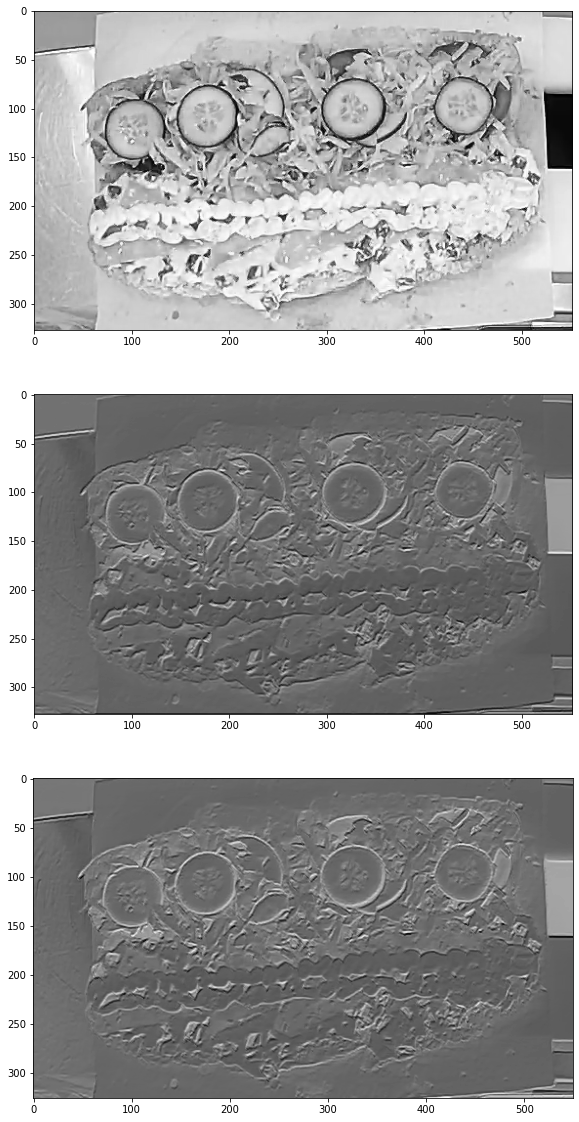

In [107]:
fig = plt.figure(figsize=(20, 20))

rows = 3
columns = 1

fig.add_subplot(rows, columns, 1)
imgplot = plt.imshow(image, cmap='gray') # cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig.add_subplot(rows, columns, 2)
imgplot = plt.imshow(cor_image, cmap='gray')

fig.add_subplot(rows, columns, 3)
imgplot = plt.imshow(cor_image_ef, cmap='gray')